# Loading In Data and First Look

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [390]:
df = pd.read_csv('CHLA_clean_data_until_2023.csv')
pd.set_option('display.max_columns', None)

In [391]:
df.head(10)

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,APPT_TYPE_STANDARDIZE,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1946298,CONFIRMED,12/26/23 10:30,6/6/23 10:32,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,Follow-up,9,1,2,0,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,4464320,RESCHEDULED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
2,4464320,CONFIRMED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
3,4146637,CONFIRMED,12/21/23 10:30,1/23/23 10:59,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,Follow-up,15,2,8,0,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,4460795,CONFIRMED,12/18/23 9:00,1/9/23 10:59,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,Follow-up,6,1,1,0,3,0,0,3,12,9,N,13,Others,Other
5,4309970,CONFIRMED,12/14/23 12:30,6/1/23 13:42,91326,VALENCIA CARE CENTER,22559756,77073282,195,Y,Follow-up,6,1,0,0,4,0,3,2,12,12,N,11,Non-Hispanic,Asian
6,4266142,CONFIRMED,12/12/23 15:30,6/5/23 13:55,91355,VALENCIA CARE CENTER,22572506,77119289,190,Y,Follow-up,3,0,0,0,2,0,1,2,12,15,N,15,Non-Hispanic,European
7,4432339,CONFIRMED,12/12/23 15:00,5/30/23 15:12,91355,VALENCIA CARE CENTER,22546457,77030697,195,Y,Follow-up,7,1,1,0,4,0,1,2,12,15,N,14,Others,Other
8,1939036,CONFIRMED,12/12/23 14:30,6/6/23 15:41,91355,VALENCIA CARE CENTER,22580908,77145568,188,Y,Follow-up,14,2,3,0,8,0,1,2,12,14,N,10,Hispanic,NorthAmerican
9,4444440,CONFIRMED,12/12/23 9:00,6/6/23 11:02,91351,VALENCIA CARE CENTER,22577973,77138773,188,Y,Follow-up,6,0,1,0,4,0,1,2,12,9,N,3,Hispanic,NorthAmerican


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MRN                                       21060 non-null  int64 
 1   APPT_STATUS                               21060 non-null  object
 2   APPT_DATE                                 21060 non-null  object
 3   BOOK_DATE                                 21060 non-null  object
 4   ZIPCODE                                   21060 non-null  object
 5   CLINIC                                    21060 non-null  object
 6   SCHEDULE_ID                               21060 non-null  int64 
 7   APPT_ID                                   21060 non-null  int64 
 8   LEAD_TIME                                 21060 non-null  int64 
 9   IS_REPEAT                                 21060 non-null  object
 10  APPT_TYPE_STANDARDIZE                     2106

# Exploratory Data Analysis/Data Cleaning

In [393]:
#checking for percent of missing values
df.isna().sum()/len(df)*100
#no missing values found

MRN                                         0.0
APPT_STATUS                                 0.0
APPT_DATE                                   0.0
BOOK_DATE                                   0.0
ZIPCODE                                     0.0
CLINIC                                      0.0
SCHEDULE_ID                                 0.0
APPT_ID                                     0.0
LEAD_TIME                                   0.0
IS_REPEAT                                   0.0
APPT_TYPE_STANDARDIZE                       0.0
APPT_NUM                                    0.0
TOTAL_NUMBER_OF_CANCELLATIONS               0.0
TOTAL_NUMBER_OF_RESCHEDULED                 0.0
TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT    0.0
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT         0.0
TOTAL_NUMBER_OF_NOSHOW                      0.0
DAY_OF_WEEK                                 0.0
WEEK_OF_MONTH                               0.0
NUM_OF_MONTH                                0.0
HOUR_OF_DAY                             

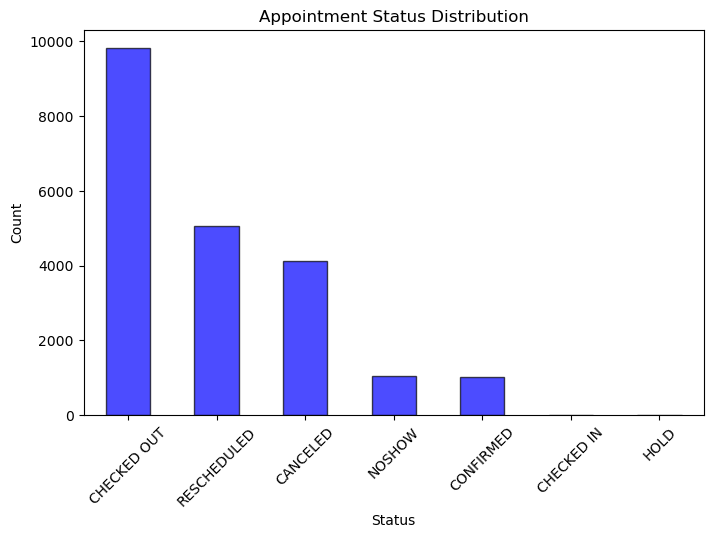

In [394]:
# Looking at distribution of Appt Status
plt.figure(figsize=(8, 5))
df['APPT_STATUS'].value_counts().plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title("Appointment Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(False)

plt.show()

Most are checked out, large imbalance in this feature, also contains a noshow value which means we might have to remove this feature.

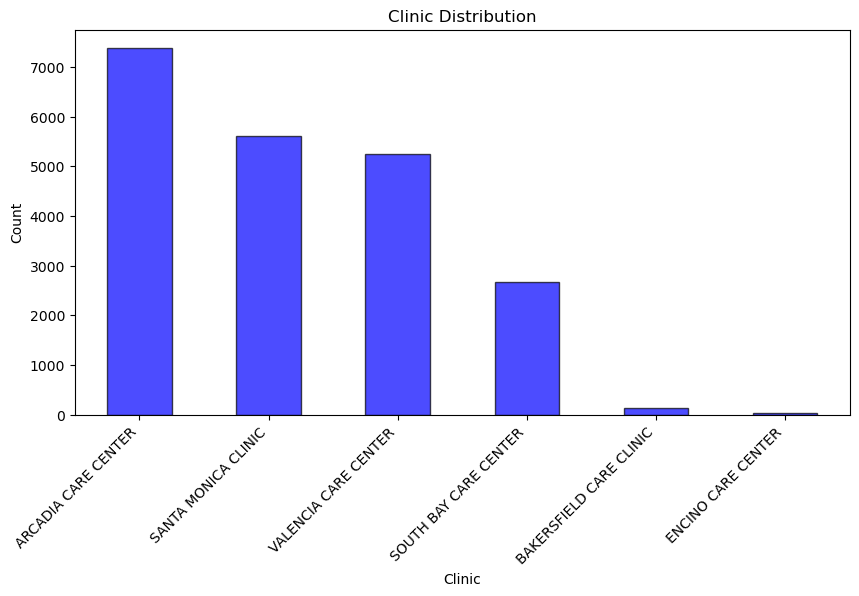

In [395]:
# Looking at distribution of clinics
plt.figure(figsize=(10, 5))
df['CLINIC'].value_counts().plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title("Clinic Distribution")
plt.xlabel("Clinic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.grid(False)

plt.show()

Once again an imbalance in the feature but each location is important as this will be a tool used by the clinics.

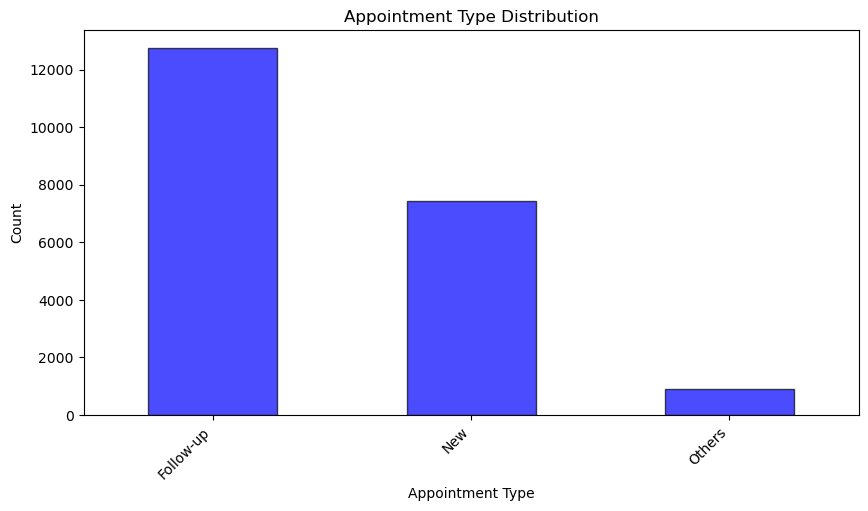

In [396]:
# Looking at distribution of appointment types
plt.figure(figsize=(10, 5))
df['APPT_TYPE_STANDARDIZE'].value_counts().plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title("Appointment Type Distribution")
plt.xlabel("Appointment Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.grid(False)

plt.show()

Most people are follow up appointments. Now let's see where our no shows are coming from.

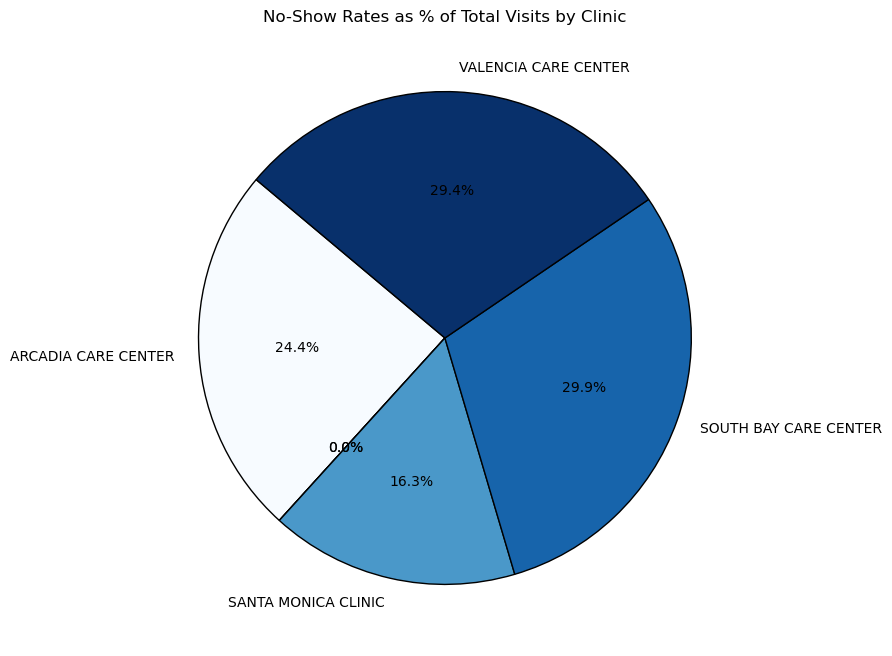

In [397]:
total_appts = df.groupby('CLINIC')['IS_NOSHOW'].count()  
no_show_counts = df[df['IS_NOSHOW'] == 'Y'].groupby('CLINIC')['IS_NOSHOW'].count() 


no_show_rates = (no_show_counts / total_appts) * 100  

plt.figure(figsize=(8, 8))
no_show_rates.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Blues', wedgeprops={'edgecolor': 'black'})
plt.title("No-Show Rates as % of Total Visits by Clinic")
plt.ylabel("") 
plt.show()

Largest share of no shows come from valencia care center.

In [398]:
df['IS_NOSHOW'].value_counts()
# Clear data imbalance, will need to address this later.

N    20027
Y     1033
Name: IS_NOSHOW, dtype: int64

In [399]:
df[df.select_dtypes(include=['object']).columns].describe()

,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,IS_REPEAT,APPT_TYPE_STANDARDIZE,IS_NOSHOW,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
count,21060,21060,21060,21060,21060,21060,21060,21060,21060,21060
unique,7,11296,15770,598,6,2,3,2,3,7
top,CHECKED OUT,9/24/18 11:00,8/29/18 15:18,91350,ARCADIA CARE CENTER,Y,Follow-up,N,Others,Other
freq,9813,11,8,550,7381,13951,12734,20027,11359,11111


Not much to comment on in terms of the distribution of our categorical columns. Next we will clean our data and find which features we want to include in our model.

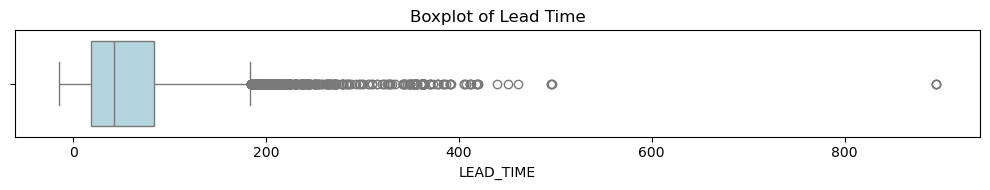

In [400]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))

sns.boxplot(x=df['LEAD_TIME'], ax=ax, color='lightblue')
ax.set_title("Boxplot of Lead Time")

plt.tight_layout()
plt.show()

In [401]:
df['LEAD_TIME'].describe()

count    21060.000000
mean        58.140646
std         56.944934
min        -15.000000
25%         18.000000
50%         42.000000
75%         84.000000
max        895.000000
Name: LEAD_TIME, dtype: float64

Definitely an outlier in lead time that will have to be dropped. There's also a negative lead time which shouldn't be possible

In [402]:
df = df[(df['LEAD_TIME'] >= 0) & (df['LEAD_TIME'] <= 400)]

Appt ID and Schedule ID are not necessary in our analysis. Will be necessary for the output data.

In [403]:
df = df.drop(columns=['APPT_ID', 'SCHEDULE_ID', 'MRN'])

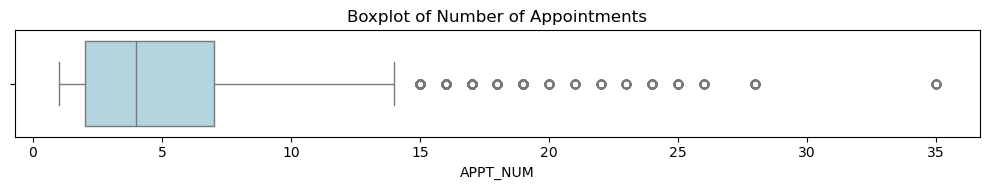

In [404]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))

sns.boxplot(x=df['APPT_NUM'], ax=ax, color='lightblue')
ax.set_title("Boxplot of Number of Appointments")

plt.tight_layout()
plt.show()

In [405]:
df['APPT_NUM'].nunique()

28

# Feature Engineering

Our categorical variables don't have too much cardinality so I won't be binning them, especially since I will be testing solely tree based models.

In [406]:
df['IS_NOSHOW'] = df['IS_NOSHOW'].map({'Y': 1, 'N': 0})
# encoding target variable

Checking numerical correlations with target variable

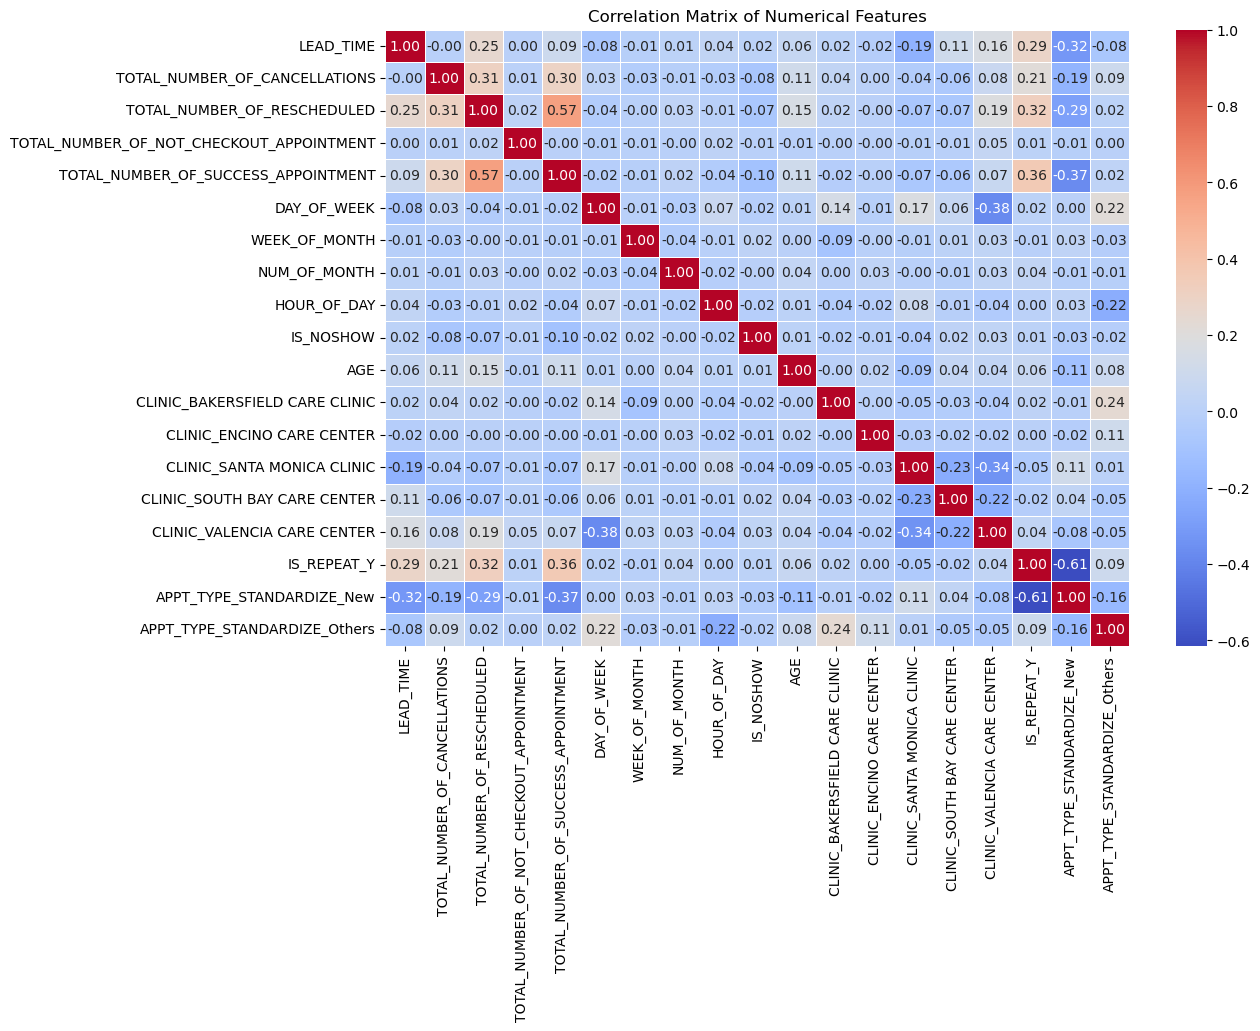

In [430]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numerical Features")

# Show plot
plt.show()

High correlations between total_numer_of columns and Appt_num column, will drop appt_num column as this can be seen among those columns. 

In [408]:
df = df.drop(columns=['APPT_NUM'])

Also dropping appt_date, book_date, and zipcode as these are not relevant to our analysis.

In [409]:
df = df.drop(columns=['APPT_DATE', 'BOOK_DATE', 'ZIPCODE'])

In [411]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

One hot encoding our variables as we don't have ordinal features.

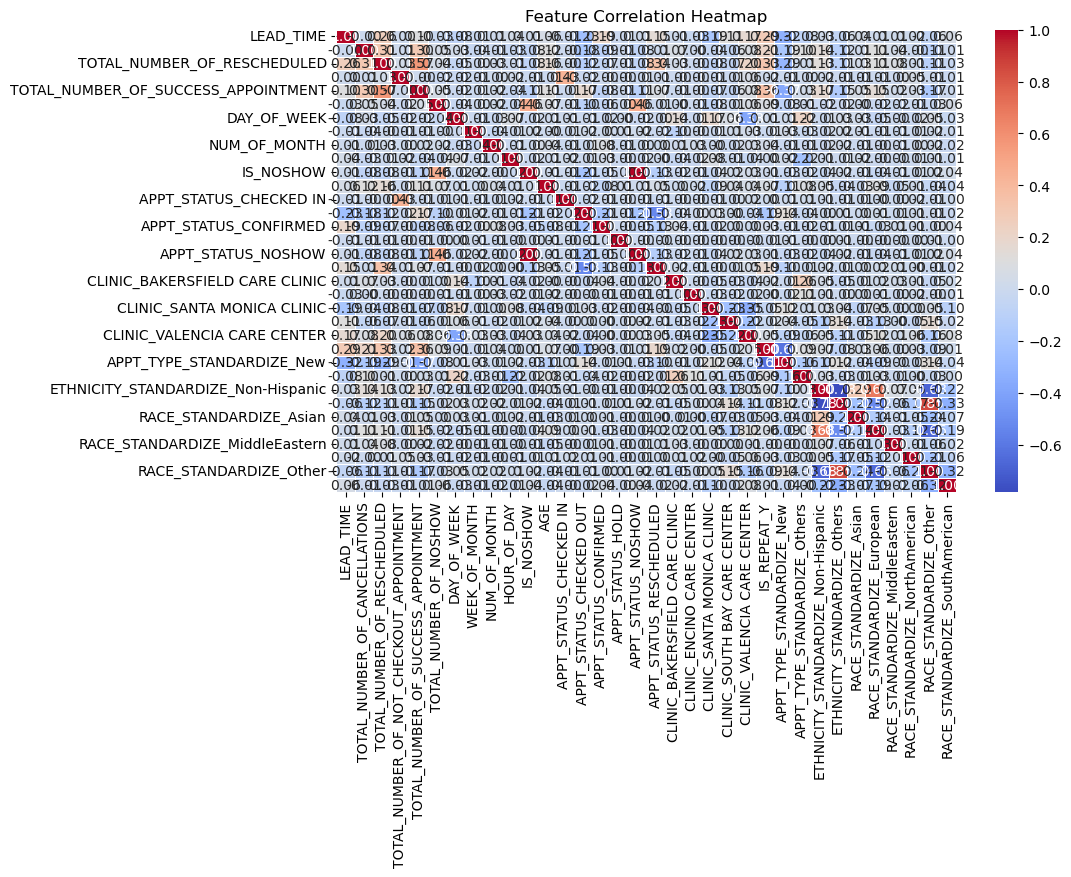

In [412]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

A messy correlation chart but still useful. We can see high correlation between our target variable and appt_status_noshow. I will drop this feature along with our race and ethnicity columns as they are highly correlated with each other.Total_number_of_noshow also highly correlated with our target variable so I'll remove this feature too.

Dropping appt_status because appt_status no show is obviously highly correlated with our target variable.

In [414]:
df=df.drop(columns=['APPT_STATUS_CHECKED IN', 'APPT_STATUS_CHECKED OUT',
       'APPT_STATUS_CONFIRMED', 'APPT_STATUS_HOLD', 'APPT_STATUS_NOSHOW', 'APPT_STATUS_RESCHEDULED', 'ETHNICITY_STANDARDIZE_Non-Hispanic', 'ETHNICITY_STANDARDIZE_Others',
       'RACE_STANDARDIZE_Asian', 'RACE_STANDARDIZE_European',
       'RACE_STANDARDIZE_MiddleEastern', 'RACE_STANDARDIZE_NorthAmerican',
       'RACE_STANDARDIZE_Other', 'RACE_STANDARDIZE_SouthAmerican', 'TOTAL_NUMBER_OF_NOSHOW'])

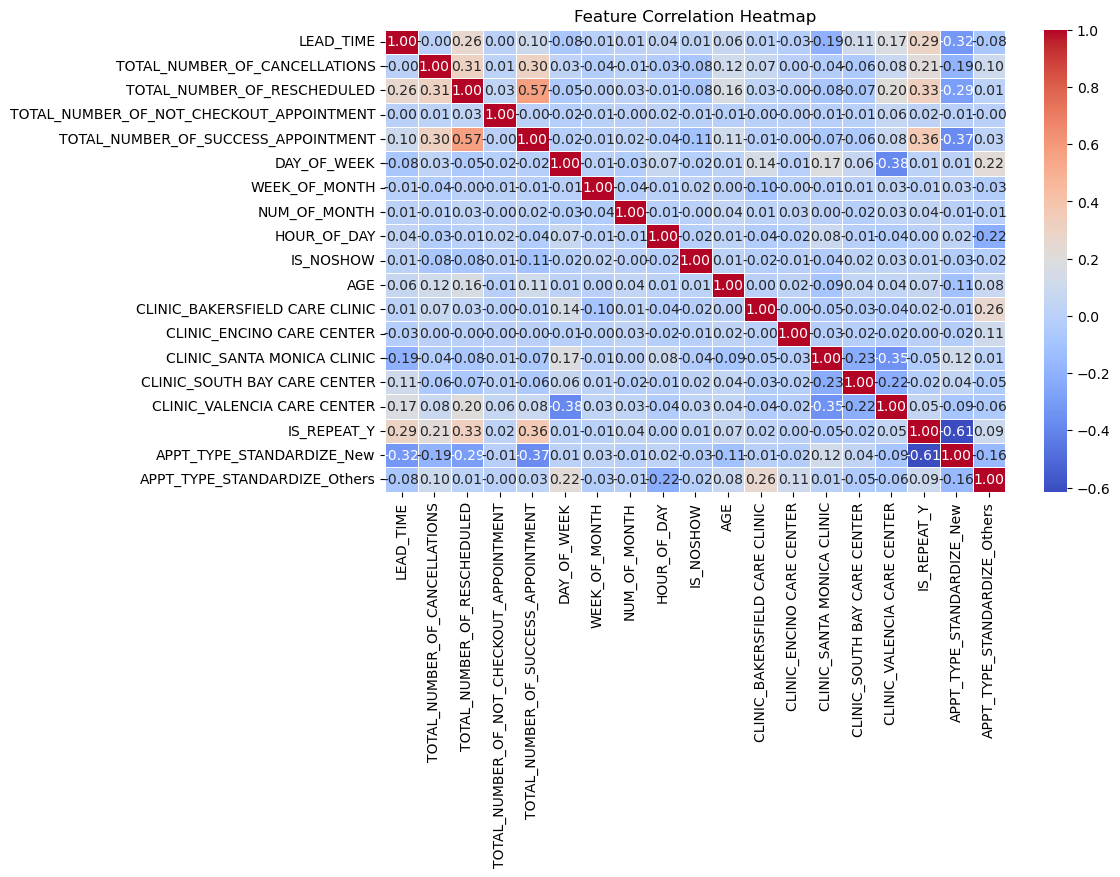

In [415]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [416]:
df = df.drop_duplicates()
#dropping duplicate rows just in case

# Oversampling

Here, due to the imbalanced nature of our dataset, I will be first undersampling our majority class (IS_NOSHOW = N), then oversampling our minority class using SMOTE. I will use SMOTE on our training set and thus split the dataset for model building while performing the different sampling techniques.

In [432]:
df_majority = df[df['IS_NOSHOW'] == 0]
df_minority = df[df['IS_NOSHOW'] == 1]

# resampling down to 3000 N's so we can get closer to a 60/40 split
df_majority_downsampled = resample(df_majority, replace=False, 
                                   n_samples=3000, random_state=42)

# Now at about a 3000 to 900 ratio, bumping this up
df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

#Splitting into x and y from the rebalanced dataset
X = df_balanced.drop(columns=['IS_NOSHOW'])  
y = df_balanced['IS_NOSHOW']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Making sure there are no duplicates between our x train and x test
overlapping_indices = X_train.index.intersection(X_test.index)
X_train = X_train.drop(overlapping_indices)
y_train = y_train.drop(overlapping_indices)

#Applying smote to our x and y train
smote = SMOTE(sampling_strategy=0.4, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

df_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_train_resampled['IS_NOSHOW'] = y_train_resampled

df_train_resampled = df_train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

#re seperating our x and y train
X_train = df_train_resampled.drop(columns=['IS_NOSHOW'])
y_train = df_train_resampled['IS_NOSHOW']

# final count for both sets
print(y_train.value_counts())
print(y_test.value_counts())

0    2400
1     960
Name: IS_NOSHOW, dtype: int64
0    600
1    207
Name: IS_NOSHOW, dtype: int64


Creating a function so we can test our metrics for our different models

In [418]:
def metrics(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Random Forest

Starting with random forest

In [434]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Pretty good F1 score with precision and recal being above 80. Now we will perform grid search to find the optimal hyper parameters

In [435]:
y_pred = rf.predict(X_test)
metrics(y_pred, y_test)

Accuracy: 0.8302
Precision: 0.8244
Recall: 0.8302
F1 Score: 0.8144


In [421]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

In [422]:
y_pred = best_rf.predict(X_test)
metrics(y_pred, y_test)


Accuracy: 0.8401
Precision: 0.8404
Recall: 0.8401
F1 Score: 0.8227


Grid search improved our metrics across the board. Now we move onto gradient boost.

# Gradient Boost

In [436]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
metrics(y_pred, y_test)

Accuracy: 0.8315
Precision: 0.8239
Recall: 0.8315
F1 Score: 0.8190


Fairly comparable to Random Forest.

In [437]:
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid, scoring="f1_weighted", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

In [438]:
metrics(y_pred, y_test)

Accuracy: 0.8377
Precision: 0.8325
Recall: 0.8377
F1 Score: 0.8240


Slightly better metrics than Random Forest.

# AdaBoost

In [439]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
metrics(y_pred, y_test)

/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8005
Precision: 0.7866
Recall: 0.8005
F1 Score: 0.7854


Not as good of a fit as random forest or gradient boost.

In [440]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42),
                           param_grid, scoring="f1_weighted", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_ab = grid_search.best_estimator_
y_pred = best_ab.predict(X_test)
metrics(y_pred, y_test)

/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

Accuracy: 0.8067
Precision: 0.7941
Recall: 0.8067
F1 Score: 0.7907


# Comparing

In [442]:
ab_y_pred = best_ab.predict(X_test)
gb_y_pred = best_gb.predict(X_test)
rf_y_pred = best_rf.predict(X_test)

ab_y_prob = best_ab.predict_proba(X_test)[:, 1]
gb_y_prob = best_gb.predict_proba(X_test)[:, 1]
rf_y_prob = best_rf.predict_proba(X_test)[:, 1]

def table_metrics(y_pred, y_test, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, auc

results = []
results.append(table_metrics(ab_y_pred, y_test, ab_y_prob))
results.append(table_metrics(gb_y_pred, y_test, gb_y_prob))
results.append(table_metrics(rf_y_pred, y_test, rf_y_prob))
df_results = pd.DataFrame(results, columns=['accuracy', 'precision', 'recall', 'f1', 'auc'],
                          index=['AdaBoost', 'GradientBoost', 'RandomForest'])
df_results

,accuracy,precision,recall,f1,auc
AdaBoost,0.806691,0.794096,0.806691,0.790715,0.804831
GradientBoost,0.837670,0.832511,0.837670,0.824019,0.826139
RandomForest,0.840149,0.840411,0.840149,0.822741,0.840109


Random forest has the best overall performance (besides F1 which goes to Gradient Boost). With an AUC of .84 I'd say Random Forest gives us the best predictive capabilities.

# Test Case

This is our test case:
* Lead_time = 202 days
* Num of cancellations = 1
* Num of rescheduled = 2
* Num of not checkout appointment = 0
* Num of successful appointments = 5
* Day of week = 1
* Week of month = 4
* Month of Year = 12
* Hour of day = 10
* Age = 14
* Care center = Valencia
* Is repeat = yes
* Appointment type = Follow up

Our expected outcome is not a no show.

In [451]:
X_train.head()

,LEAD_TIME,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,AGE,CLINIC_BAKERSFIELD CARE CLINIC,CLINIC_ENCINO CARE CENTER,CLINIC_SANTA MONICA CLINIC,CLINIC_SOUTH BAY CARE CENTER,CLINIC_VALENCIA CARE CENTER,IS_REPEAT_Y,APPT_TYPE_STANDARDIZE_New,APPT_TYPE_STANDARDIZE_Others
0,35,1,0,0,0,1,4,3,9,10,0,0,0,0,0,0,1,0
1,12,2,0,0,1,1,5,11,11,13,0,0,0,0,1,1,0,0
2,40,2,1,0,1,1,4,3,11,8,0,0,0,0,0,1,0,0
3,15,1,0,0,1,2,4,3,9,9,0,0,1,0,0,0,1,0
4,90,1,1,0,0,2,2,1,9,12,0,0,0,1,0,1,0,0


In [453]:
X_train.columns

Index(['LEAD_TIME', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'DAY_OF_WEEK', 'WEEK_OF_MONTH',
       'NUM_OF_MONTH', 'HOUR_OF_DAY', 'AGE', 'CLINIC_BAKERSFIELD CARE CLINIC',
       'CLINIC_ENCINO CARE CENTER', 'CLINIC_SANTA MONICA CLINIC',
       'CLINIC_SOUTH BAY CARE CENTER', 'CLINIC_VALENCIA CARE CENTER',
       'IS_REPEAT_Y', 'APPT_TYPE_STANDARDIZE_New',
       'APPT_TYPE_STANDARDIZE_Others'],
      dtype='object')

In [446]:
example = [202, 1, 2, 0, 5, 1, 4, 12, 10, 14, 0, 0, 0, 0, 1, 1, 0, 0]
example_df = pd.DataFrame([example], columns=X_train.columns)

In [448]:
example_pred = best_rf.predict(example_df)
example_prob = best_rf.predict_proba(example_df)

if example_pred[0] == 0:
    pred = "This patient is likely to show up"
    prob = example_prob[0][0]
else:
    pred = "This patient is not likely to show up"
    prob = example_prob[0][1]

print("Predicted Class: ", pred)
print(f"Probability: {prob:.2%}")

Predicted Class:  This patient is likely to show up
Probability: 76.64%


It looks like our model predicted correctly! We'll go ahead and export this model for our deployed system.

# Exporting Model

In [449]:
import pickle

In [450]:
ml_model = 'noshow_predictor.sav'
pickle.dump(best_rf, open(ml_model, 'wb'))

In [454]:
# Note the versions revealed in this section for inputs to requirements.txt file later

print("Pandas version:", pd.__version__)

# If you are using numpy in this code also uncomment two lines below:
import numpy as np
print("numpy cersion:", np.__version__)

!python --version
!pip show scikit-learn

Pandas version: 1.5.3
numpy cersion: 1.26.4
Python 3.11.5
Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/tommyropp/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sentence-transformers
